In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [7]:
data=pd.read_csv('handwritten_data_785.csv')

In [8]:
data1=np.array(data)
img=np.array(data1[0,1:])

In [9]:
print(img)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 136 210
 167  20   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2 122 250 254 231  73   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2  86 232
 202 150 253 146  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  35 197 234  75  21 233 225  35   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  99
 249 169   6   0 163 254  90   0   0   0   0   0   

In [10]:
img=np.reshape(img,(28,28))

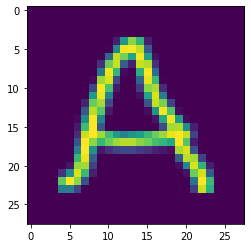

In [11]:
plt.imshow(img)
plt.show()

In [12]:
from tensorflow import keras
num_classes=26
img_size=28
num_images=data.shape[0]
def prepare(raw):
  y= raw[:,0]
  out_y=keras.utils.to_categorical(y, num_classes)

  X=raw[:,1:]
  out_x=np.reshape(X,(num_images,img_size,img_size,1))
  out_x=out_x/255

  return out_x, out_y

In [13]:
X, y= prepare(data1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D

char_recog= Sequential()
char_recog.add(Conv2D(64, kernel_size=(5,5), activation='relu', input_shape=(img_size,img_size,1)))
char_recog.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
char_recog.add(MaxPooling2D(pool_size = (2, 2)))
char_recog.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
char_recog.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
char_recog.add(Flatten())
char_recog.add(Dense(100, activation='relu'))
char_recog.add(Dense(num_classes,activation='softmax'))

#Compiling the model

char_recog.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

#fit the model

char_recog.fit(X_train,y_train, batch_size=126, epochs=3, validation_split=0.2)

Epoch 1/3
1654/1654 [==============================] - 602s 364ms/step - loss: 0.1931 - accuracy: 0.9473 - val_loss: 0.0957 - val_accuracy: 0.9738
Epoch 2/3
1654/1654 [==============================] - 615s 372ms/step - loss: 0.0689 - accuracy: 0.9811 - val_loss: 0.0724 - val_accuracy: 0.9818
Epoch 3/3
1654/1654 [==============================] - 612s 370ms/step - loss: 0.0521 - accuracy: 0.9854 - val_loss: 0.0562 - val_accuracy: 0.9850


In [20]:
test_scores = char_recog.evaluate(X_test,y_test)

3488/3488 [==============================] - 80s 23ms/step - loss: 0.0581 - accuracy: 0.9842


In [21]:
print("Accuracy of the model:", test_scores[1])

Accuracy of the model: 0.9842400550842285
